# Project report: French employment, salaries, population per town

This dataset consists information about salary number, population size and number of different firms among numerous cities in France. The dataset is created by organization called INSEE that is the official french institute gathering data of many types around France.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d7/France_base_map_18_regions.png/1200px-France_base_map_18_regions.png" width="460px" height="460px">

In dataset we have 4 main tables:
 - base_etablissement_par_tranche_effectif.csv: give information on the number of firms in every french town, categorized by size
 - namegeographicinformation.csv: give geographic data on french town like latitude and longitude, region name etc.
 - netsalarypertownper_category.csv: salaries around french town per job categories, age and sex
 - population.csv : demographic information in France per town, age, sex and living mode
 
As well as, ther is also file departments.geojson that contains the borders of french departments, but will not be used in this research.

Generally, France is second largest country in Europe, so there are a lot of characteristic to measure in terms of slaraies and industries. France is know to be liberal and centrilized country, and one of the points would be to see how equally distrubuted salaries are in different regions. Moreover, it is also know that Paris (Ile-de-France) is the 

## Loading data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.colors as colors

base_etablissement_par_tranche_effectif is a table that represents number of firms in each city regarding their size. This table without processing has more that 35000 rows with such columns

    - CODGEO : geographique code for the town
    - LIBGEO : name of the town (in french)
    - REG : region number
    - DEP : depatment number
    - E14TST : total number of firms in the town
    - E14TS0ND : number of unknown or null size firms in the town
    - E14TS1 : number of firms with 1 to 5 employees in the town
    - E14TS6 : number of firms with 6 to 9 employees in the town
    - E14TS10 : number of firms with 10 to 19 employees in the town
    - E14TS20 : number of firms with 20 to 49 employees in the town
    - E14TS50 : number of firms with 50 to 99 employees in the town
    - E14TS100 : number of firms with 100 to 199 employees in the town
    - E14TS200 : number of firms with 200 to 499 employees in the town
    - E14TS500 : number of firms with more than 500 employees in the town
    


In [2]:
firms = pd.read_csv('base_etablissement_par_tranche_effectif.csv')

print(len(firms))

firms.head(6)

36681


,CODGEO,LIBGEO,REG,DEP,E14TST,E14TS0ND,E14TS1,E14TS6,E14TS10,E14TS20,E14TS50,E14TS100,E14TS200,E14TS500
0,01001,L'Abergement-Clémenciat,82,01,25,22,1,2,0,0,0,0,0,0
1,01002,L'Abergement-de-Varey,82,01,10,9,1,0,0,0,0,0,0,0
2,01004,Ambérieu-en-Bugey,82,01,996,577,272,63,46,24,9,3,2,0
3,01005,Ambérieux-en-Dombes,82,01,99,73,20,3,1,2,0,0,0,0
4,01006,Ambléon,82,01,4,4,0,0,0,0,0,0,0,0
5,01007,Ambronay,82,01,124,87,20,10,5,2,0,0,0,0


name_geographic_information is a table that represents geographical and regional infromation. There are such columns:

    - EU_circo : name of the European Union Circonscription
    - code_région : code of the region attached to the town
    - nom_région : name of the region attached to the town
    - chef.lieu_région : name the administrative center around the town
    - numéro_département : code of the department attached to the town
    - nom_département : name of the department attached to the town
    - préfecture : name of the local administrative division around the town
    - numéro_circonscription : number of the circumpscription
    - nom_commune : name of the town
    - codes_postaux : post-codes relative to the town
    - code_insee : unique code for the town (CODGEO)
    - latitude : GPS latitude
    - longitude : GPS longitude
    - éloignement

In [3]:
cities = pd.read_csv('name_geographic_information.csv')


print(len(cities))

cities.head(6)

36840


,EU_circo,code_région,nom_région,chef.lieu_région,numéro_département,nom_département,préfecture,numéro_circonscription,nom_commune,codes_postaux,code_insee,latitude,longitude,éloignement
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.05,1.71
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.4,1.01
5,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bourg-en-Bresse,01000,1053,46.200000,5.216667,1.00


net_salary_per_town_categories is a table that represents salaries in differnt cities categorized by gender and age groups. There are such columns:

    - CODGEO : unique code of the town
    - LIBGEO : name of the town
    - SNHM14 : mean net salary
    - SNHMC14 : mean net salary per hour for executive
    - SNHMP14 : mean net salary per hour for middle manager
    - SNHME14 : mean net salary per hour for employee
    - SNHMO14 : mean net salary per hour for worker
    - SNHMF14 : mean net salary for women
    - SNHMFC14 : mean net salary per hour for feminin executive
    - SNHMFP14 : mean net salary per hour for feminin middle manager
    - SNHMFE14 : mean net salary per hour for feminin employee
    - SNHMFO14 : mean net salary per hour for feminin worker
    - SNHMH14 : mean net salary for man
    - SNHMHC14 : mean net salary per hour for masculin executive
    - SNHMHP14 : mean net salary per hour for masculin middle manager
    - SNHMHE14 : mean net salary per hour for masculin employee
    - SNHMHO14 : mean net salary per hour for masculin worker
    - SNHM1814 : mean net salary per hour for 18-25 years old
    - SNHM2614 : mean net salary per hour for 26-50 years old
    - SNHM5014 : mean net salary per hour for >50 years old
    - SNHMF1814 : mean net salary per hour for women between 18-25 years old
    - SNHMF2614 : mean net salary per hour for women between 26-50 years old
    - SNHMF5014 : mean net salary per hour for women >50 years old
    - SNHMH1814 : mean net salary per hour for men between 18-25 years old
    - SNHMH2614 : mean net salary per hour for men between 26-50 years old
    - SNHMH5014 : mean net salary per hour for men >50 years old


In [4]:
salary = pd.read_csv('net_salary_per_town_categories.csv')

salary.head(6)

,CODGEO,LIBGEO,SNHM14,SNHMC14,SNHMP14,SNHME14,SNHMO14,SNHMF14,SNHMFC14,SNHMFP14,...,SNHMHO14,SNHM1814,SNHM2614,SNHM5014,SNHMF1814,SNHMF2614,SNHMF5014,SNHMH1814,SNHMH2614,SNHMH5014
0,01004,Ambérieu-en-Bugey,13.7,24.2,15.5,10.3,11.2,11.6,19.1,13.2,...,11.6,10.5,13.7,16.1,9.7,11.8,12.5,11.0,14.9,18.6
1,01007,Ambronay,13.5,22.1,14.7,10.7,11.4,11.9,19.0,13.3,...,11.7,9.8,13.8,14.6,9.2,12.2,12.5,10.2,14.9,16.4
2,01014,Arbent,13.5,27.6,15.6,11.1,11.1,10.9,19.5,11.7,...,11.8,9.3,13.3,16.0,8.9,10.6,12.5,9.6,15.1,18.6
3,01024,Attignat,12.9,21.8,14.1,11.0,11.3,11.4,19.0,13.0,...,11.6,9.6,12.9,14.2,9.3,11.4,12.2,9.7,13.8,15.9
4,01025,Bâgé-la-Ville,13.0,22.8,14.1,10.5,11.1,11.6,19.4,13.6,...,11.4,9.4,12.8,15.2,9.0,11.8,12.3,9.7,13.4,16.9
5,01027,Balan,13.9,22.2,15.1,11.0,11.4,12.5,20.3,14.0,...,11.7,9.7,14.1,15.4,9.5,12.8,13.0,9.9,15.3,17.2


population is a table that represents poupation sizes for different age groups. There are such columns:

    - NIVGEO : geographic level (arrondissement, communes…)
    - CODGEO : unique code for the town
    - LIBGEO : name of the town
    - MOCO : cohabitation mode :
    - 11 = children living with two parents
    - 12 = children living with one parent
    - 21 = adults living in couple without child
    - 22 = adults living in couple with children
    - 23 = adults living alone with children
    - 31 = persons not from family living in the home
    - 32 = persons living alone
    - AGE80_17 : age category (slice of 5 years) | ex : 0 -> people between 0 and 4 years old
    - SEXE : sex, 1 for men | 2 for women
    - NB : Number of people in the category

In [5]:
population = pd.read_csv('population.csv')

population.head(6)

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20
5,COM,1001,L'Abergement-Clémenciat,11,10,2,45


Overall, dataset presents us various tables that let us understand slary distribution among regions, genders and professional positions. Most valueable table would be "salary" and "firms" due tp the fact that give us the main insights about French industry and careers.

## Post-processing the data

Post-processing step is crucially important in any kind of research due to various errors in values, specefici goals of the project etc. In this dataset there are some incosstencies and issues in several columns (e.g. "CODGEO", "longitude", "latitude" etc.). That is why in this step there are going to be value cleaning, feature extraction and grouping proceeded. Such step is necessary for following analysis since there would be more features to work with and confidence in data accuracy.

In all tables one of the important things is to identify incosistent values in "CODGEO" column since it should be convertable to int from string. But sometimes the column stores inapropriate values for integer like character, so these rows are removed.

#### Firms

For firms table we would group the firms into 4 groups. According to the European Commission, we can divide enterprises info five categories based on number of employees: Micro < 10, Small < 50, Medium < 250, Large < 1000 and Enterprise > 1000. Let's create new columns that will be closer to representing those oficial categories. We will also create columns that will represent percentage of total number of businesses that is represented by each category.

Also, we drop columns used for grouping and E14TS0ND one because it does not bring any valuable information and there is a lack of information about firms. 

In [6]:
firms = firms[firms["CODGEO"].apply(lambda x: str(x).isdigit())]

firms["CODGEO"] = firms["CODGEO"].astype(int)

firms['Micro'] = firms['E14TS1'] + firms['E14TS6']
firms['Small'] = firms['E14TS10'] + firms['E14TS20']
firms['Medium'] = firms['E14TS50'] + firms['E14TS100']
firms['Large'] = firms['E14TS200'] + firms['E14TS500']

firms = firms.drop(columns=[ 'E14TS0ND', 'E14TS1',
       'E14TS6', 'E14TS10', 'E14TS20', 'E14TS50', 'E14TS100', 'E14TS200',
       'E14TS500'])

#### Cities

The columns in firms table are written in French, so most column would be tranlated into English. Here "code_insee" column is also checked for incosistency in terms of integer type and duplicates.

In [7]:
renaming = {'nom_région': 'region_name',
              'chef.lieu_région': 'region_capital',
              'nom_commune': 'common_name',
              'codes_postaux': 'postcodes',
               'code_région': 'region_code',
               'numéro_département': 'department_number',
               'nom_département':'department_name',
               'préfecture': 'perfecture',
               'numéro_circonscription':'constituency_number',
               'éloignement':'remoteness'
           }

cities.rename(columns=renaming, inplace=True)

cities.drop_duplicates(subset=["code_insee"], keep="first", inplace=True)


In thi table thee are location presented for each city and such information might be used for analysis. Firstly, the longitude and latitude are checked for incosistent values. Then, there are created two more features out of "longitude" and "latitude": 

    - paris_distance : distance between current city and Paris in kilometers
    - capital_distance : distance between current city and curent department capital in kilometers
    
These features would be used in analysis for correlation with salary mean|.

In [8]:
cities["longitude"] = cities["longitude"].apply(lambda x: str(x).replace(',','.'))

mask = cities["longitude"] == '-'
cities.drop(cities[mask].index, inplace=True)

cities.dropna(subset = ["longitude", "latitude"], inplace=True)

cities["longitude"] = cities["longitude"].astype(float)

paris_lat = cities.loc[cities["common_name"] == "Paris"].iloc[0]["latitude"]
paris_lon = cities.loc[cities["common_name"] == "Paris"].iloc[0]["longitude"]

from math import radians, cos, sin, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    # convert decimal degrees to radians 
    lon1 = radians(lon1)
    lat1 = radians(lat1)
    lon2 = radians(lon2)
    lat2 = radians(lat2)
    #lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

distances = []

for index, row in cities.iterrows():
    distances.append(haversine(row["longitude"], row["latitude"], paris_lon, paris_lat))

cities["paris_distance"] = pd.Series(distances, index=cities.index)

capital_coor = {}

unique_capitals = np.unique(cities['region_capital'].values)

for capital_name in unique_capitals:
    capital = cities[cities['common_name'] == capital_name]
    
    capital_coor[capital_name] = [capital["longitude"], capital["latitude"]]

distances = []

for index, row in cities.iterrows():
    capital_lon, capital_lat = capital_coor[row['region_capital']]
    distances.append(haversine(row["longitude"], row["latitude"], capital_lon, capital_lat))

cities["capital_distance"] = pd.Series(distances, index=cities.index)

cities.head()

,EU_circo,region_code,region_name,region_capital,department_number,department_name,perfecture,constituency_number,common_name,postcodes,code_insee,latitude,longitude,remoteness,paris_distance,capital_distance
0,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Attignat,01340,1024,46.283333,5.166667,1.21,357.279466,64.147289
1,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Beaupont,01270,1029,46.400000,5.266667,1.91,351.427294,79.100567
2,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bény,01370,1038,46.333333,5.283333,1.51,358.096440,72.978906
3,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Béreyziat,01340,1040,46.366667,5.050000,1.71,344.538574,70.285284
4,Sud-Est,82,Rhône-Alpes,Lyon,01,Ain,Bourg-en-Bresse,1,Bohas-Meyriat-Rignat,01250,1245,46.133333,5.400000,1.01,381.306716,60.211880


"salary" and "population" tables are checked in incorrect values in "CODGEO" table. Such check allow us to properly join these tables with "cities" table.

In [9]:
salary = salary[salary["CODGEO"].apply(lambda x: str(x).isdigit())]

salary["CODGEO"] = salary["CODGEO"].astype(int)

In [10]:
population = population[population["CODGEO"].apply(lambda x: str(x).isdigit())]

population["CODGEO"] = population["CODGEO"].astype(int)

Besides, there is a new table introduced called "new_population"4. It represents summarized number of citizens in each city in column "NB". Duvh geature will help us to see any correlation between population size and salary.

In [11]:
new_population = population.groupby(['CODGEO']).sum()

new_population.head()

,MOCO,AGEQ80_17,SEXE,NB
CODGEO,,,,
1001,5168,9520,357,765
1002,5168,9520,357,227
1004,5168,9520,357,13460
1005,5168,9520,357,1595
1006,5168,9520,357,84


After post-processing columns of all tables were checked for incosistencies and corrected. By such action we guaranteed sucessful join operation between tables.

Besides, there were created a few features that will help to provide much deeper analysis and give more insights. 

Overall, such step is rather necessary for further analysis.

## Analysis

In this section I would like to do some analysis and answer some questions.

Questions:

- how is industry developed in France? what region/city is the most developed?
- what are well-paid regions in France?
- what regions of Ile-de-France and districts of Paris are best-payed?
- what is the payment among regions, professions and genders?
- how average salary correlates with number of firms and population size
- is payment equal among regions/departments and genders?
- what city has the lowest gender pay gap?


- P.S. Regression of salary on profession, population size, firm number, gender

### Inudstry

In this section we would like to get an overall view on industry situation in France. Threre is an assumption is the biggest dominant industry center, so we would like to prove is it true or not.

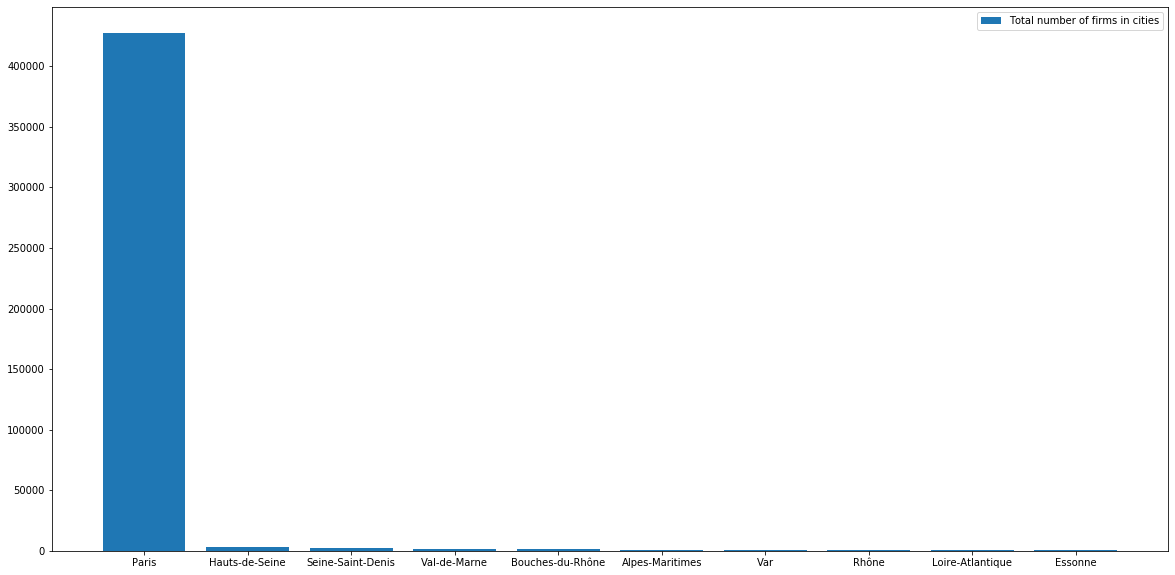

In [12]:
total = firms.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['department_name']).mean()

res = res.sort_values('E14TST', ascending=False)

index, results = res.index.values, res['E14TST'].values

plt.figure(figsize=(20,10))

plt.bar(index[:10], results[:10], label="Total number of firms in cities")
plt.legend()
plt.show()

From bar plot above we can see that deparments in Ile-de-France and East-South regions has the biggest number of firms. In particular Paris region has one extremely high number of comapnies comapring to other regions. Here we can see vividly see that mostly all firms are located in Paris.

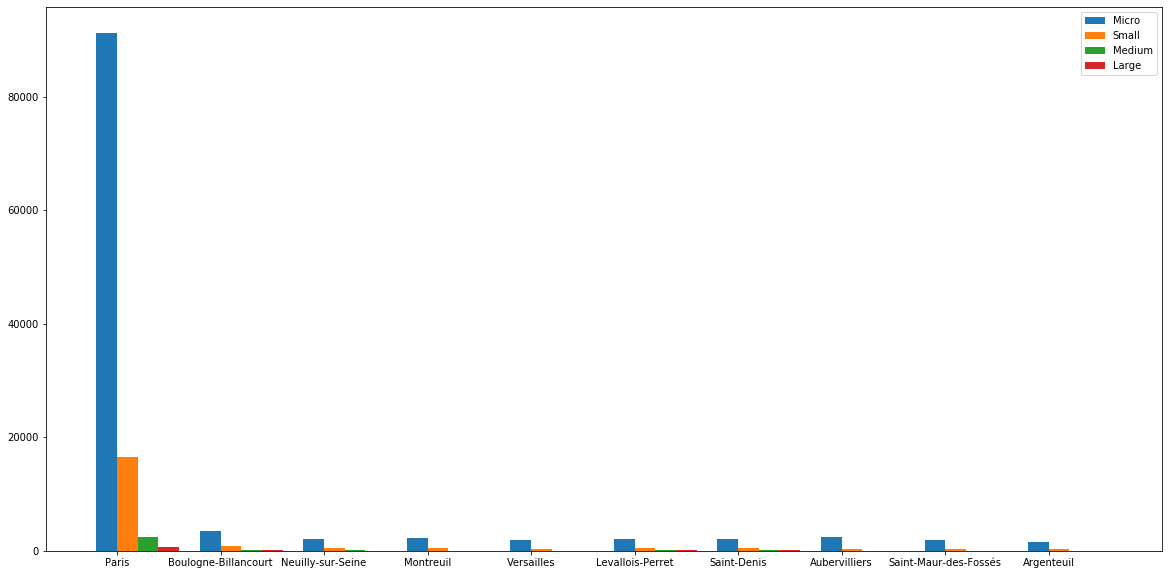

In [13]:
new_name = cities[cities['EU_circo'] == 'Île-de-France']

total = firms.merge(new_name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.sort_values('E14TST', ascending=False)

index, results = res['common_name'], res['E14TST'].values


plt.figure(figsize=(20,10))

width = 0.2
ind = np.arange(index.shape[0])

plt.bar(ind[:10], res['Micro'][:10], width=width, label="Micro")
plt.bar(ind[:10]+width, res['Small'].values[:10], width=width, label='Small')
plt.bar(ind[:10]+width*2, res['Medium'].values[:10], width=width, label='Medium')
plt.bar(ind[:10]+width*3, res['Large'].values[:10], width=width, label='Large')


plt.xticks(ind[:10] + width / 2, index[:10])
plt.legend()
plt.show()

In this bar plot we can see that the cities with highest number of firms are located in Paris districts or in Paris Metropoian

In [14]:
import os
os.environ['PROJ_LIB'] = '/home/mykoa/anaconda3/envs/nets/share/proj'
#set your anaconda3/envs/ENVIRONMENT_NAME/share/proj foler
#conda install  basemap, 
#conda install proj4 
#conda install basemap-data-hires
from mpl_toolkits.basemap import Basemap

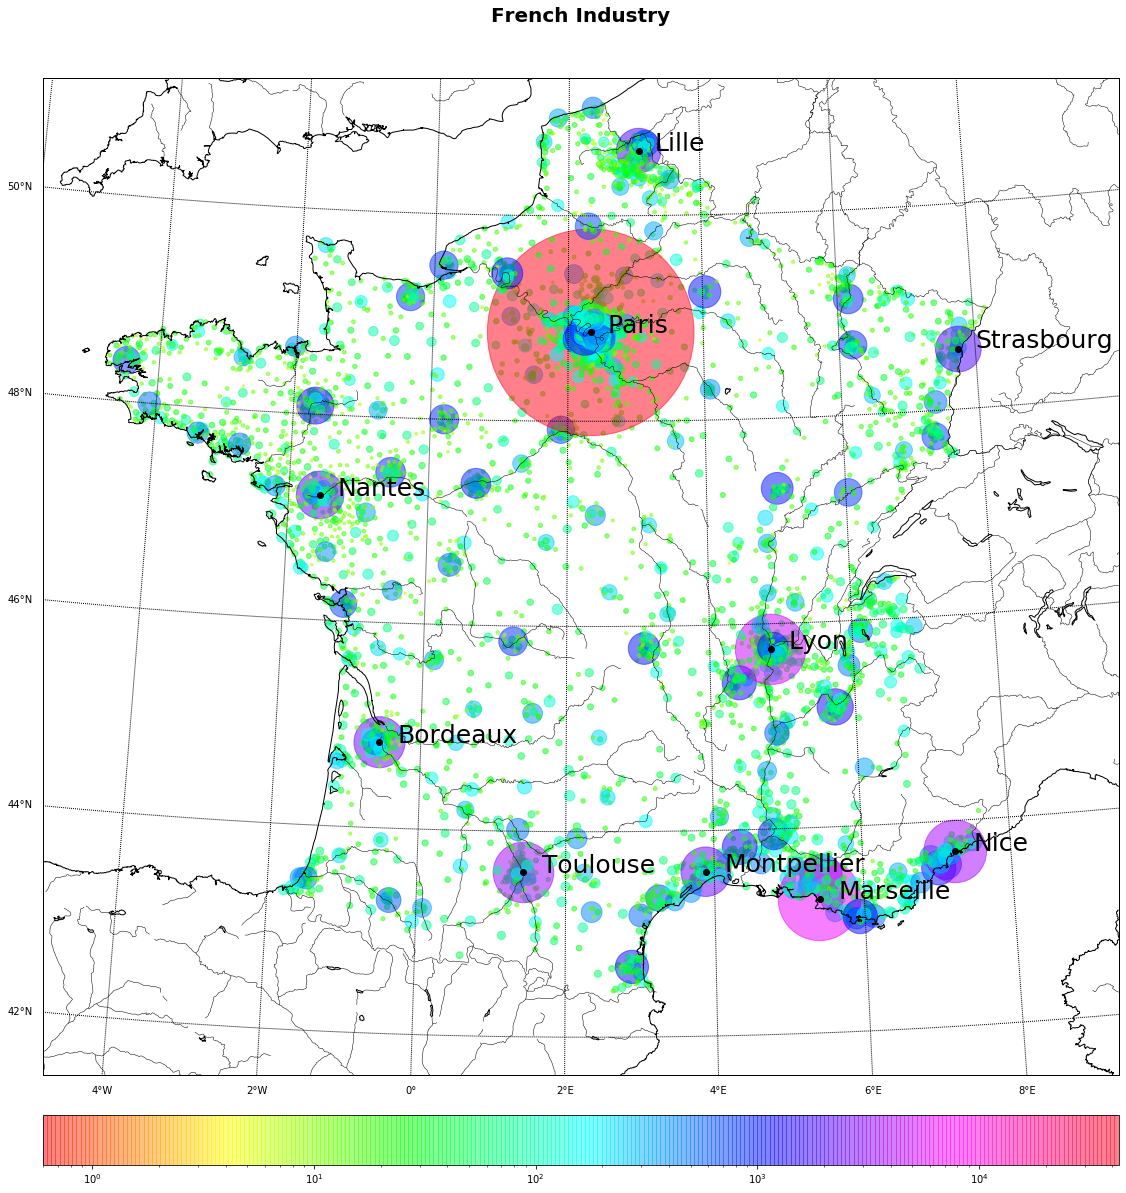

In [15]:
full_data = firms.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

full_data = full_data.merge(salary, left_on='CODGEO', right_on='CODGEO',
          suffixes=('', '_right'))

top_industry = full_data.sort_values(by=["E14TST"], ascending=False).head(10)
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

regions = full_data[["region_name", "E14TST"]].groupby("region_name").sum().sort_values("E14TST", ascending=False).reset_index().reset_index()
regions.rename(columns={'index': 'region_rank',}, inplace=True)

by_regions = full_data.merge(regions[["region_name", "region_rank"]], how="left", on="region_name" )

lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["E14TST"]/10).values.tolist()
region = by_regions["region_rank"].values.tolist()

regions_capitals = by_regions[by_regions["region_capital"] == by_regions["common_name"]]
lons_capital = regions_capitals["longitude"].values.tolist()
lats_capital = regions_capitals["latitude"].values.tolist()
names_region = regions_capitals["region_name"].values.tolist()

# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)

size = np.array(size)

map.scatter(x, y, s=size, alpha=0.5, c=size, norm=colors.LogNorm(vmin=min(size), vmax=max(size)), cmap='hsv')
map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

    
plt.title("French Industry", fontsize=20, fontweight='bold', y=1.05)   

plt.show()

Out of the map it can be easily understood that most firms are based in Paris and its areas. As well as, the second dominant region is French Riviera.

Anyway, it is visible that France is centrized economically. And most career opportunies are in Paris.

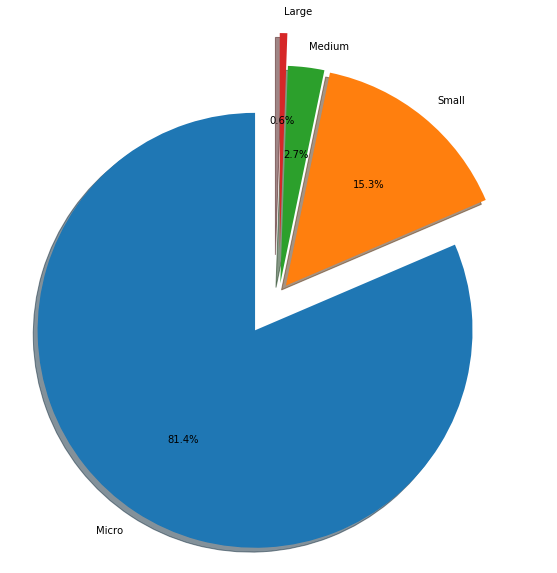

In [16]:
res = firms.sum()

select = res[['Micro', 'Small', 'Medium', 'Large']]

plt.figure(figsize=(10, 10))

plt.pie(select, explode=[.2,.05,.05,.2], labels=['Micro', 'Small', 'Medium', 'Large'], autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

Here we see that the majority of firms are in Micro group (1-9 employees).

Overall, it can be concluded that Paris is a base for most firms. Therefore, most people are coming to Paris for job opportunities, meaning Paris and Ile-de-France are the biggest industrial centers of France.

### Mean salary

In this section we would like to identify what regions makes the most money. As well as, here we can also see where you should go in case you are willing to rise your salary by moving into different city.

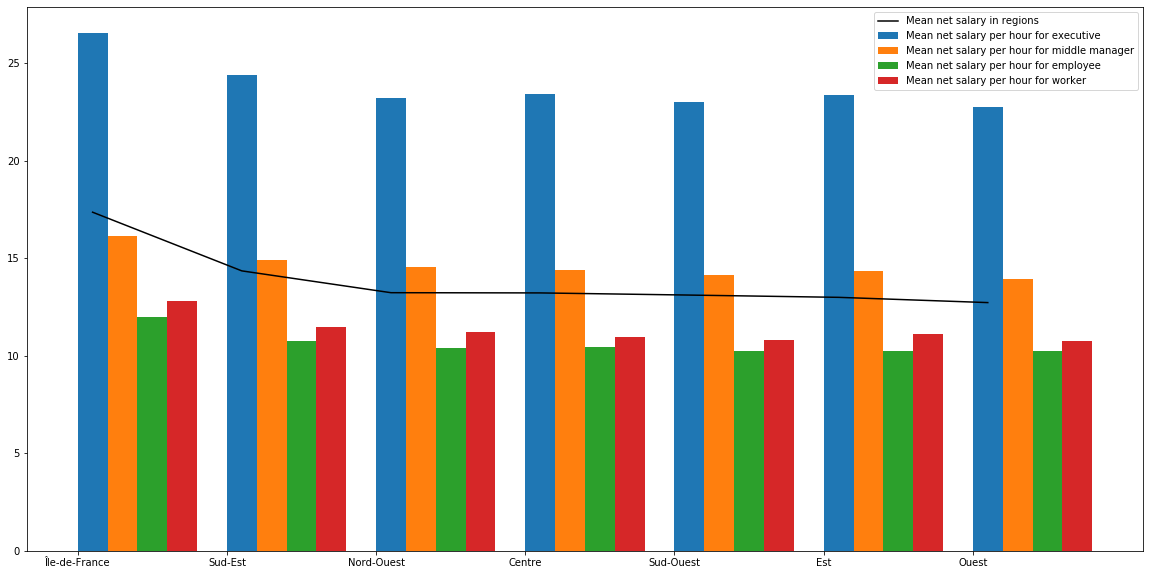

In [17]:
total = salary.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['EU_circo']).mean()

res = res.sort_values('SNHM14', ascending=False)

index, results = res.index.values, res['SNHM14'].values


width = 0.2
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])
# SNHMC14 : mean net salary per hour for executive
# SNHMP14 : mean net salary per hour for middle manager
# SNHME14 : mean net salary per hour for employee
# SNHMO14 : mean net salary per hour for worker

plt.bar(ind[:10]+width, res['SNHMC14'].values[:10], width=width, label='Mean net salary per hour for executive')
plt.bar(ind[:10]+width*2, res['SNHMP14'].values[:10], width=width, label='Mean net salary per hour for middle manager')
plt.bar(ind[:10]+width*3, res['SNHME14'].values[:10], width=width, label='Mean net salary per hour for employee')
plt.bar(ind[:10]+width*4, res['SNHMO14'].values[:10], width=width, label='Mean net salary per hour for worker')

plt.xticks(ind + width / 2, index)

plt.plot(ind[:10]+width, results[:10], c='black', label="Mean net salary in regions")

plt.legend(loc='best')
plt.show()

Consequently, not only Paris is dominant in terms of industry sizesm, but also is the leader in terms of mean salary. Here it is displayed that second well-payed region is Sud-Est where big cities such as Marseille, Nice, Lyon and Montpellier are located. After that other regions have almost the same mean salary. On average we can see that most region have mean salary at 13 euros per hour, where Ide-de-France and Sud-Est have 17 and 15 respectively.

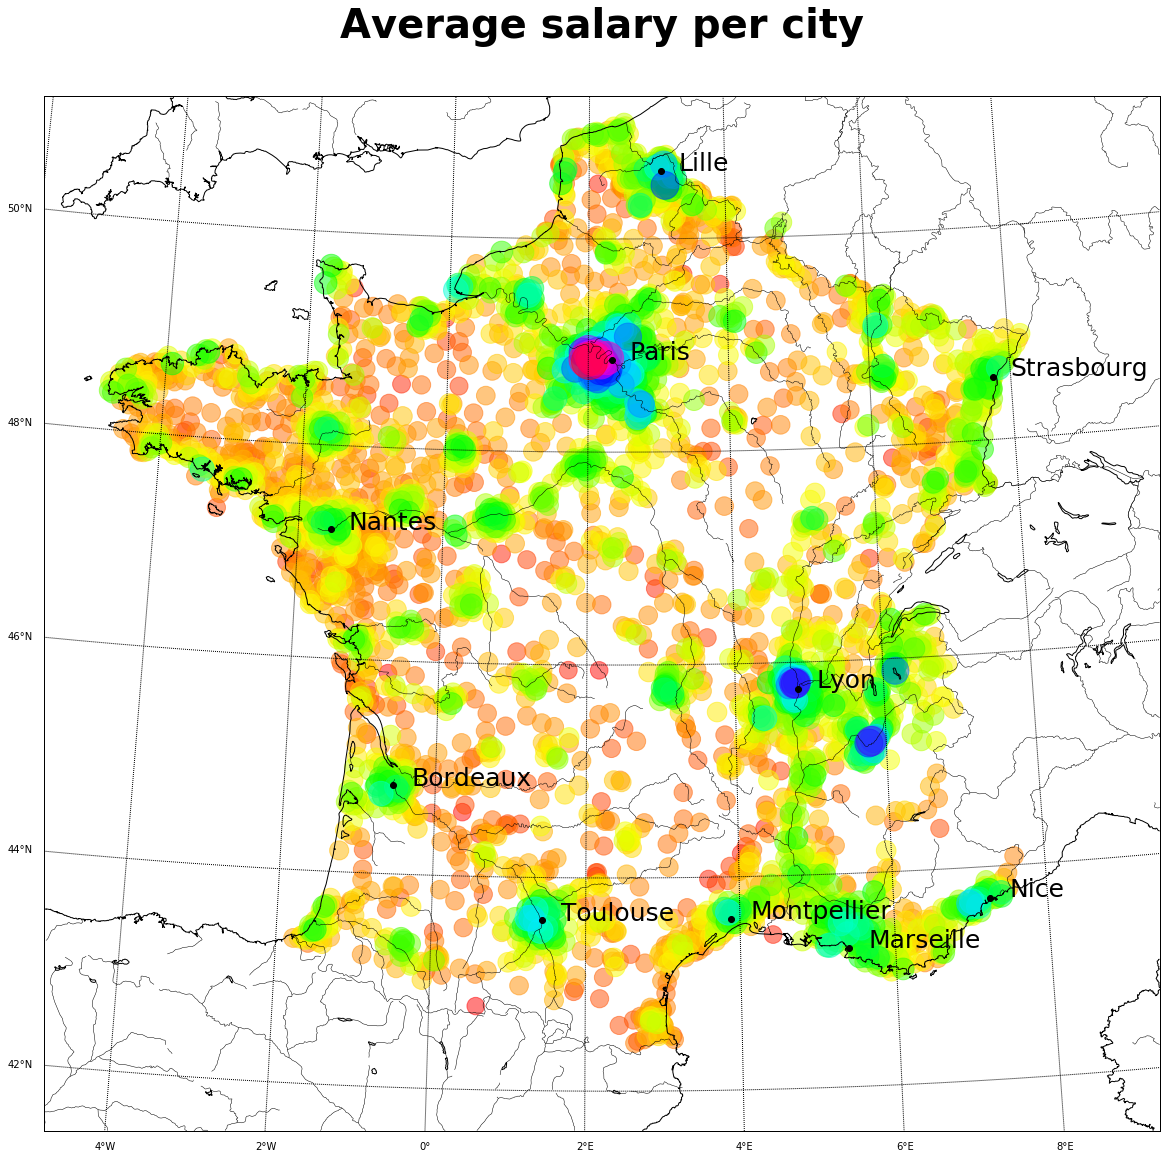

In [18]:
full_data = firms.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

full_data = full_data.merge(salary, left_on='CODGEO', right_on='CODGEO',
          suffixes=('', '_right'))

full_data = full_data.sort_values('SNHM14', ascending=True)

top_industry = full_data.sort_values(by=["E14TST"], ascending=False).head(10)
top_industry_names = top_industry["LIBGEO"].values.tolist()
top_industry_lons = top_industry["longitude"].values.tolist()
top_industry_lats = top_industry["latitude"].values.tolist()

regions = full_data[["region_name", "E14TST"]].groupby("region_name").sum().sort_values("E14TST", ascending=False).reset_index().reset_index()
regions.rename(columns={'index': 'region_rank',}, inplace=True)

by_regions = full_data.merge(regions[["region_name", "region_rank"]], how="left", on="region_name" )

lons = full_data["longitude"].values.tolist()
lats = full_data["latitude"].values.tolist()
size = (full_data["SNHM14"]*10).values.tolist()
region = by_regions["region_rank"].values.tolist()

regions_capitals = by_regions[by_regions["region_capital"] == by_regions["common_name"]]
lons_capital = regions_capitals["longitude"].values.tolist()
lats_capital = regions_capitals["latitude"].values.tolist()
names_region = regions_capitals["region_name"].values.tolist()

# Creating new plot
plt.figure(figsize=(20,20))
# Load map of France
map = Basemap(projection='lcc', 
            lat_0=46.2374,
            lon_0=2.375,
            resolution='h',
            llcrnrlon=-4.76, llcrnrlat=41.39,
            urcrnrlon=10.51, urcrnrlat=51.08)

# Draw parallels.
parallels = np.arange(40.,52,2.)
map.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# Draw meridians
meridians = np.arange(-6.,10.,2.)
map.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

map.drawcoastlines()
map.drawcountries()
map.drawmapboundary()
map.drawrivers()

# Draw scatter plot with all cities
x,y = map(lons, lats)

size = np.array(size)

map.scatter(x, y, s=size*3, alpha=0.5, c=size, norm=colors.LogNorm(vmin=min(size), vmax=max(size)), cmap='hsv')
# map.colorbar(location="bottom", pad="4%")

# Draw scatter plot of cities with highiest number of workplaces
x1, y1 = map(top_industry_lons, top_industry_lats)
map.scatter(x1, y1, c="black")

for i in range(len(top_industry_names)):
    plt.annotate(top_industry_names[i], xy=(map(top_industry_lons[i] + 0.25,  top_industry_lats[i])), fontsize=25)

    
plt.title("Average salary per city", fontsize=40, fontweight='bold', y=1.05)   

plt.show()

Continuing to this map, it also visiable the concetration of most well-payed regions. It is visible that Ile-de-France cities earn the most amount of money (displayed with red) and also second coming is Lyon.

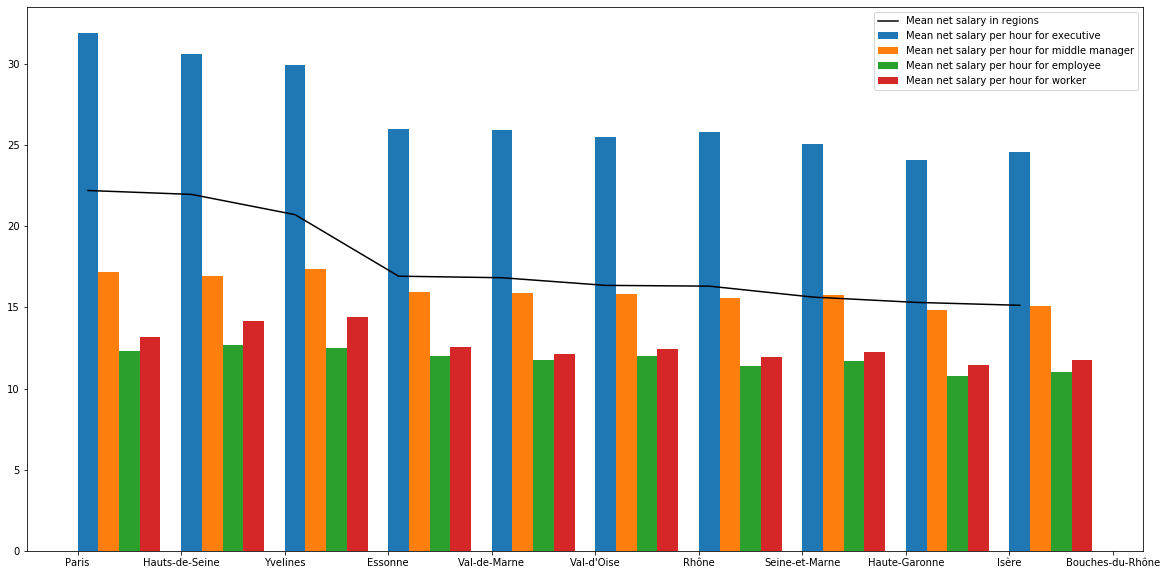

In [19]:
total = salary.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['department_name']).mean()

res = res.sort_values('SNHM14', ascending=False)

index, results = res.index.values, res['SNHM14'].values


width = 0.2
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])
# SNHMC14 : mean net salary per hour for executive
# SNHMP14 : mean net salary per hour for middle manager
# SNHME14 : mean net salary per hour for employee
# SNHMO14 : mean net salary per hour for worker

plt.bar(ind[:10]+width, res['SNHMC14'].values[:10], width=width, label='Mean net salary per hour for executive')
plt.bar(ind[:10]+width*2, res['SNHMP14'].values[:10], width=width, label='Mean net salary per hour for middle manager')
plt.bar(ind[:10]+width*3, res['SNHME14'].values[:10], width=width, label='Mean net salary per hour for employee')
plt.bar(ind[:10]+width*4, res['SNHMO14'].values[:10], width=width, label='Mean net salary per hour for worker')

plt.xticks(ind + width / 2, index)

plt.plot(ind[:10]+width, results[:10], c='black', label="Mean net salary in regions")

plt.legend(loc='best')
plt.show()

In this plot it is shown that the most well-payed departments are Ile-de-France ones and then deparments of South-East are coming. It is also visible that Middle manager, Employee and Worker positions do not have so much differnce among these regions, though the biggest change in salary we can see in Executive positions.

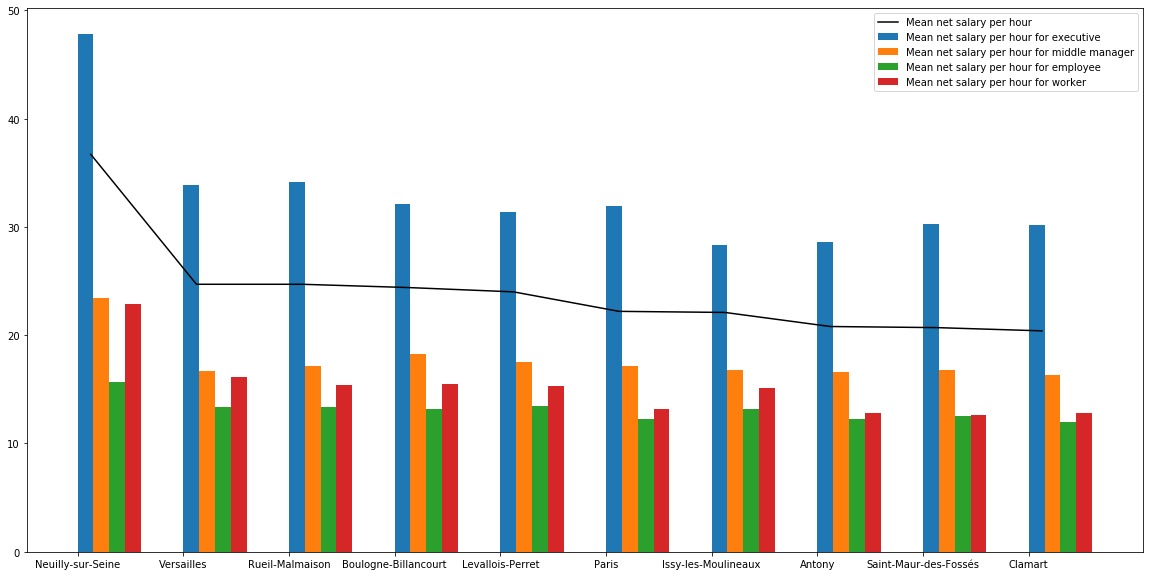

In [20]:
new_cities = cities.merge(new_population, left_on='code_insee', right_on='CODGEO',
          suffixes=('', '_right'))

new_name = new_cities[new_cities['EU_circo'] == 'Île-de-France']
new_name = new_name[new_name["NB"] > 50000]

total = salary.merge(new_name, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

# res = total.groupby(['department_name']).mean()

res = total.sort_values('SNHM14', ascending=False)


index, results = res['common_name'], res['SNHM14'].values


width = 0.15
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])

# plt.bar(ind[:10], results[:10], width=width, label="Mean net salary in regions")
plt.bar(ind[:10]+width, res['SNHMC14'].values[:10], width=width, label='Mean net salary per hour for executive')
plt.bar(ind[:10]+width*2, res['SNHMP14'].values[:10], width=width, label='Mean net salary per hour for middle manager')
plt.bar(ind[:10]+width*3, res['SNHME14'].values[:10], width=width, label='Mean net salary per hour for employee')
plt.bar(ind[:10]+width*4, res['SNHMO14'].values[:10], width=width, label='Mean net salary per hour for worker')

plt.xticks(ind[:10] + width / 2, index[:10])

plt.plot(ind[:10]+0.2, results[:10], c='black', label="Mean net salary per hour")
plt.legend(loc='best')

In this plot above there are displayed Ile-de-France cities and communes with population more than 50k that have the gihest mean salary. There are also displayed mean salaries per category.

Due to its location in Le Defense, Neully-sur-seine commune has the extremely high salaries for Executive postions. It can be explained because of high density of big firms in this area.

### Salary correlation

In this section we would look whether mean slary of city is correlated with other parameters such as population size, number of firms in categories presented above, distances from capital and Paris.

Index(['LIBGEO_left', 'SNHM14', 'paris_distance', 'capital_distance', 'E14TST',
       'Micro', 'Small', 'Medium', 'Large', 'NB'],
      dtype='object')


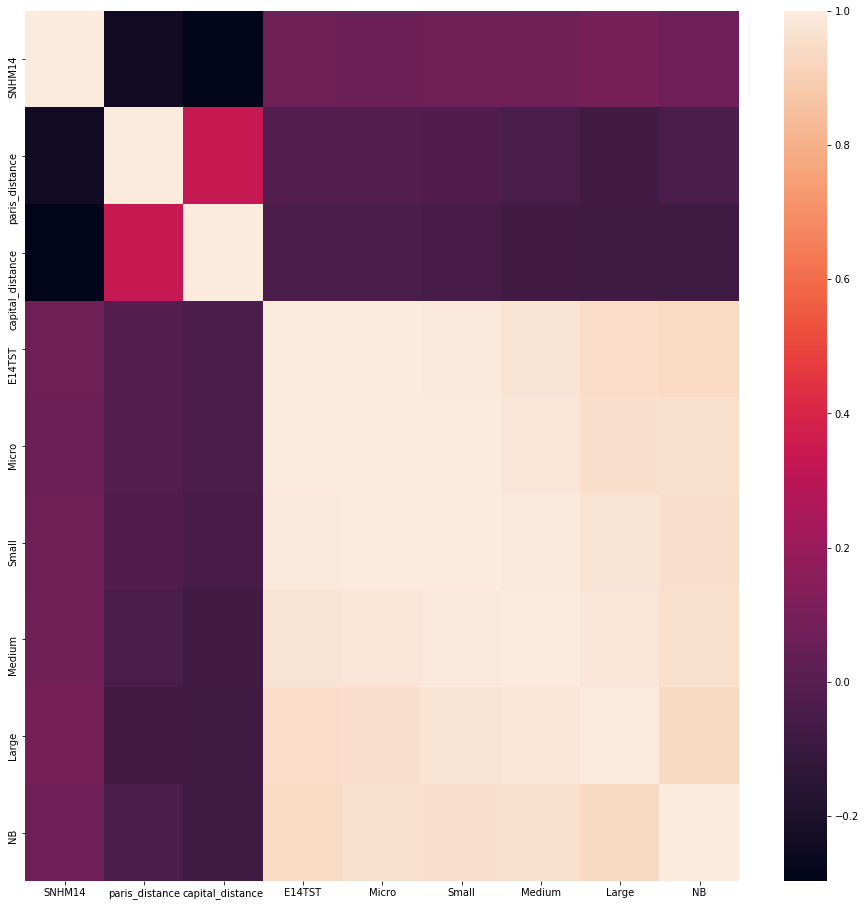

In [21]:
total = salary.merge(cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

total = total.merge(firms, left_on='CODGEO', right_on='CODGEO',
          suffixes=('_left', '_right'))


total = total.merge(new_population, left_on='CODGEO', right_on='CODGEO',
          suffixes=('_left', '_right'))

total.drop([
        'CODGEO',
        'SNHMC14', 'SNHMP14', 'SNHME14', 'SNHMO14', 'SNHMF14', 'SNHMH14',
        'SNHMFC14', 'SNHMFP14', 'SNHMFE14', 'SNHMFO14',
        'SNHMHC14', 'SNHMHP14', 'SNHMHE14', 'SNHMHO14', 'SNHM1814',
       'SNHM2614', 'SNHM5014', 'SNHMF1814', 'SNHMF2614', 'SNHMF5014',
       'SNHMH1814', 'SNHMH2614', 'SNHMH5014', 
        'EU_circo', 'region_code',
       'region_name', 'region_capital', 'department_number', 'department_name',
       'perfecture', 'constituency_number', 'common_name', 'postcodes',
       'code_insee', 'latitude', 'longitude', 'remoteness', 'LIBGEO_right',
       'REG', 'DEP', 
        'MOCO', 'AGEQ80_17', 'SEXE'
           ], axis=1, inplace=True)

print(total.columns)

corr = total.corr()

import seaborn as sns

plt.figure(figsize=(16, 16))

sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

plt.show()

In this table we can see that has either almost zero or negative weak correlation between mean salary and other properties of cities. Generally, it is visible that salary negative correlates with number of distances to Paris and capital city of the department. And there is almost no correlation betweennumber of firms in the city and mean salary.

In [22]:
correlation_salary_population = np.corrcoef(total['SNHM14'], total['NB'])[0][1]
print('Correlation between salary mean and population size', correlation_salary_population)

Correlation between salary mean and population size 0.06904584716159884


Here we can see that the correlation between salary mean and population size is extremely low. So, we can conclude that salary does not depend on city size.

In [23]:
correlation_salary_large_business = np.corrcoef(total['SNHM14'], total['Large'])[0][1]
print('Correlation between salary mean and number of large businesses',correlation_salary_large_business)

Correlation between salary mean and number of large businesses 0.09746579212474975


Besides, there is still no correlation between salary and number of large firms in the city. This actually seems a bit strange but still.

In [24]:
correlation_salary_paris_distance = np.corrcoef(total['SNHM14'], total['paris_distance'])[0][1]
correlation_salary_capital_distance = np.corrcoef(total['SNHM14'], total['capital_distance'])[0][1]
print('Correlation between salary mean and distance to department captial', correlation_salary_capital_distance)
print('Correlation between salary mean and distance to Paris',correlation_salary_paris_distance)

Correlation between salary mean and distance to department captial -0.2969863739071728
Correlation between salary mean and distance to Paris -0.23747917514862363


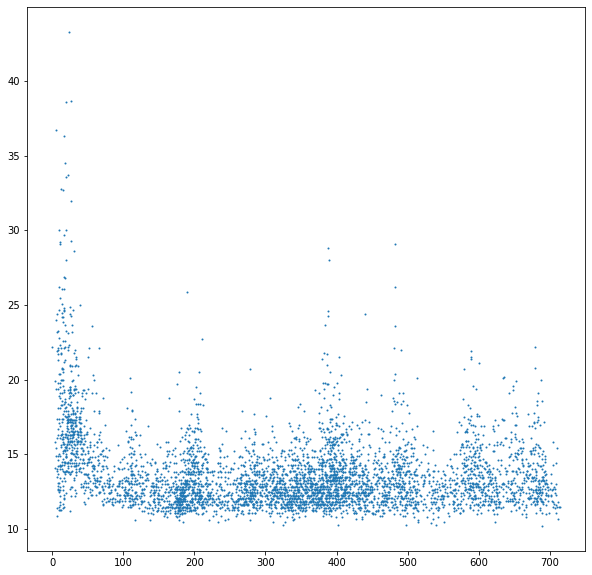

In [33]:
plt.figure(figsize=(10,10))
plt.scatter(total['paris_distance'], total['SNHM14'], s=1)
plt.show()

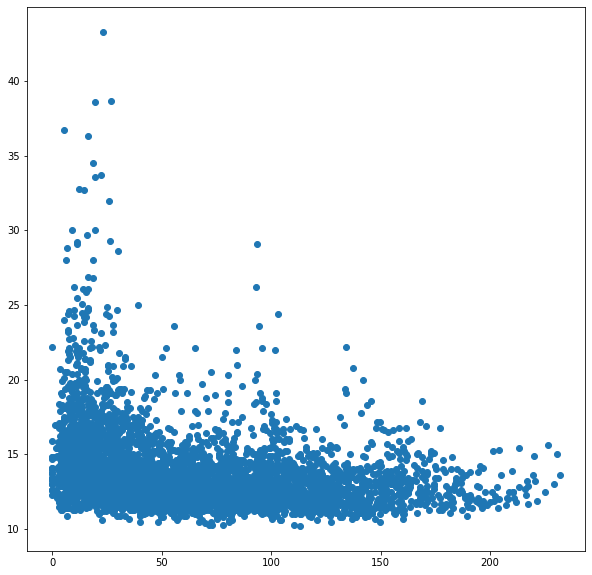

In [31]:
plt.figure(figsize=(10,10))
plt.scatter( total['capital_distance'], total['SNHM14'])
plt.show()

Here we can see that the correlation between distances to capital/Paris is negative, but still not that high. It means that there is a weak correlation displaying that the salaries increases with decrease of particular distance measurement (Distance goes up, salary goes down). Though such correlation is pretty weak and we can not fully depend on this property.

### Equality between genders

In this sections there would be shown the rate of inqueality of salary paid for man and woman. Also, it would be displayed what departments present the most qual pay among genders.

Inquailty difference in euros per hour: 2.45
Inquailty difference in euros per month: 343.64


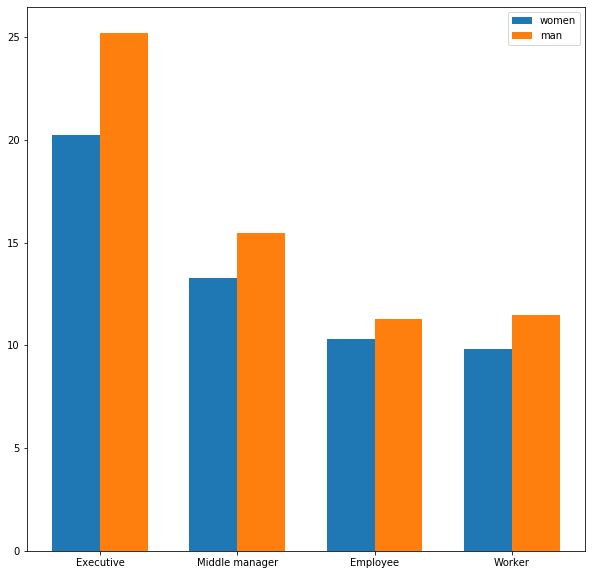

In [35]:

women_ex = np.mean(salary['SNHMFC14'])
women_man = np.mean(salary['SNHMFP14'])
women_emp = np.mean(salary['SNHMFE14'])
women_work = np.mean(salary['SNHMFO14'])


men_ex = np.mean(salary['SNHMHC14'])
men_man = np.mean(salary['SNHMHP14'])
men_emp = np.mean(salary['SNHMHE14'])
men_work = np.mean(salary['SNHMHO14'])

dif = np.mean([men_ex, men_man, men_emp, men_work])-np.mean([women_ex, women_man, women_emp, women_work])
print('Inquailty difference in euros per hour: {0:0.2f}'.format(dif))
print('Inquailty difference in euros per month: {0:0.2f}'.format(dif*20*7))

ind = np.arange(4)

plt.figure(figsize=(10,10))

plt.bar(ind, [women_ex, women_man, women_emp, women_work], 0.35, label="women")
plt.bar(ind+0.35, [men_ex, men_man, men_emp, men_work], 0.35, label='man')

plt.xticks(ind + 0.35 / 2, ['Executive', 'Middle manager', 'Employee', 'Worker'])
plt.legend()
plt.show()



In the grpah above we can see that inequality payment exsts in France. On average women earn hourly around 2.45 euros less than man. In case the person work full-time, the differnce would be 343.5 euros per month. I think it is pretty big difference.

Moreover, it is also show that the beigger position the person takes the giher the pay gap is. Meaning that there is not that much of difference for Emplyee and Worker, but there is a bigger gap in higher positions.

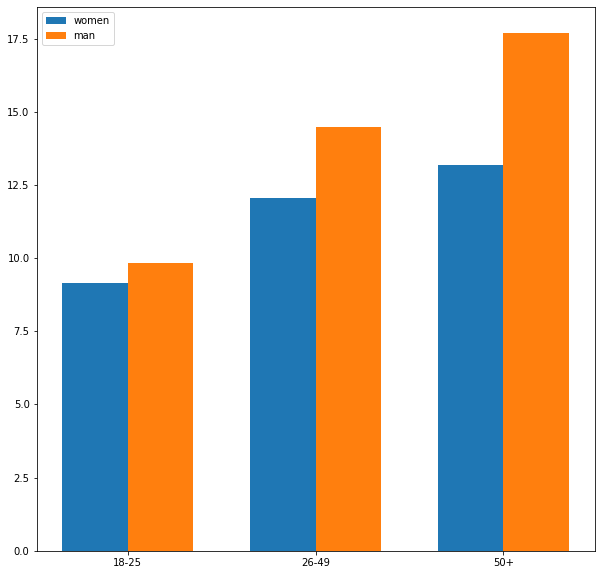

In [36]:
women18 = np.mean(salary['SNHMF1814'])
women26 = np.mean(salary['SNHMF2614'])
women50 = np.mean(salary['SNHMF5014'])

men18 = np.mean(salary['SNHMH1814'])
men26 = np.mean(salary['SNHMH2614'])
men50 = np.mean(salary['SNHMH5014'])

ind = np.arange(3)

plt.figure(figsize=(10,10))

plt.bar(ind, [women18, women26, women50], 0.35, label="women")
plt.bar(ind+0.35, [men18, men26, men50], 0.35, label='man')

plt.xticks(ind + 0.35 / 2, ['18-25', '26-49', '50+'])
plt.legend()
plt.show()

In the plot above it is shown that pay gap also grow with the age. In the group 18-25 years the pay gap between gernders is pretty low, but in 26+ the pay gap is highly visible.

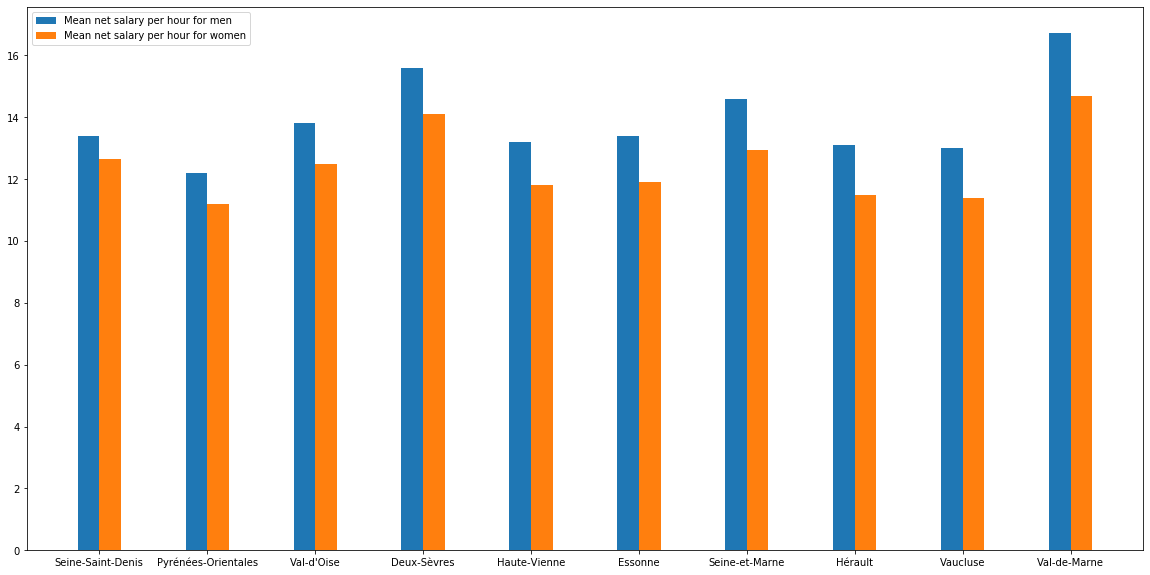

In [37]:
# SNHMF14

new_cities = cities.merge(new_population, left_on='code_insee', right_on='CODGEO',
          suffixes=('', '_right'))

new_cities = new_cities[new_cities["NB"] > 50000]

total = salary.merge(new_cities, left_on='CODGEO', right_on='code_insee',
          suffixes=('_left', '_right'))

res = total.groupby(['department_name']).mean()

res['equality'] = 1 - res['SNHMF14'].values/res['SNHMH14'].values

res = res.sort_values('equality', ascending=True)


index, results = res.index.values, res['SNHM14'].values


width = 0.2
plt.figure(figsize=(20,10))

ind = np.arange(index.shape[0])

# plt.bar(ind[:10], results[:10], width=width, label="Mean net salary")
plt.bar(ind[:10], res['SNHMH14'].values[:10], width=width, label='Mean net salary per hour for men')
plt.bar(ind[:10]+width, res['SNHMF14'].values[:10], width=width, label='Mean net salary per hour for women')


plt.xticks(ind[:10] + width / 2, index[:10])



plt.legend(loc='best')
plt.show()

In displayed barplot there were presented top 10 departments with lower rate of inequality gap. As we see, the departments are distributed all around France, so there is no correlation between geographical position and pay gap.

Here there is also presented a plot that displayes mean salary among all cities. This graph gives us understanding about difference in payment within France.

In [39]:
salary_by_location = salary.sort_values("SNHM14", ascending=False)[["LIBGEO", "SNHM14"]]
salary_by_location.drop_duplicates("LIBGEO", inplace=True)
locations = salary_by_location["LIBGEO"].values
wage = salary_by_location["SNHM14"].values
samples = list(range(len(locations)))

sample_colors = ['#051937', '#2b3953',
               '#505c70', '#78818d',
               '#a4a8ac']

trace1 = go.Bar(
    x = locations,
    y = wage,
    name='Wealth inequality',
    marker=dict(
        color=samples,
        colorscale='Jet'
    )
)

data = [trace1]

layout = go.Layout(
    barmode='stack',
    title = 'Wealth inequality',
    titlefont=dict(size=25),
    width=850,
    height=500,
    margin=go.Margin(
        l=75,
        r=20,
        b=60,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    xaxis=dict(
        title= 'Cities',
        autorange=True,
        showgrid=False,
        zeroline=False,
        showline=False,
        tickmode='auto',
        ticks='',
        showticklabels=True
    ),
    yaxis = dict(
        title= 'Average earnings [€/hour]',
        anchor = 'x',
        rangemode='tozero'
    ),
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(barmode="relative")
py.iplot(fig)

/home/mykoa/anaconda3/envs/nets/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:410: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




As it is displayed, almost every city has the same mean salary with small percent of outliers that earn drastically more. It can be concluded that among different regions there is equality in terms of payment. So this is a good sign that people are free to choose place to live.

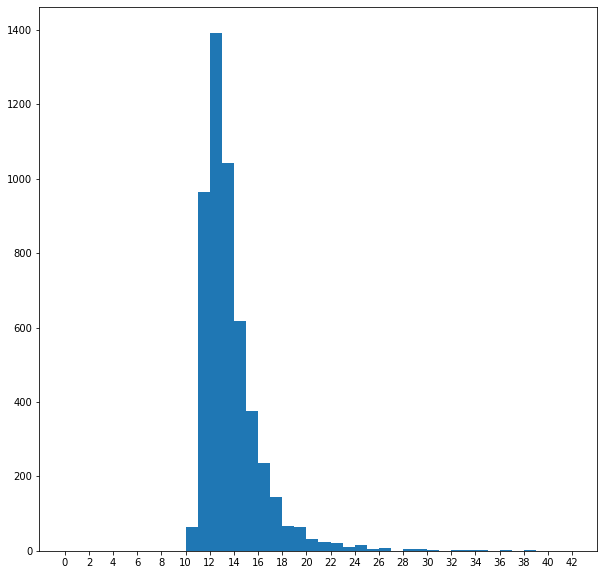

In [52]:
salary_means = salary['SNHM14'].values

plt.figure(figsize=(10,10))
plt.hist(salary_means, bins=range(np.max(salary_means).astype('int')))
plt.xticks(range(0, np.max(salary_means).astype('int'), 2))
plt.show()

In histogram above there is a distribution of salary mean values. It is obvious that the majority of values lay within values { 12,13,14 }. Such distribution can be described as exponential, because median is shifted to the left side. Such high peak of distribution and low values of other bins of histogram can show that the majorithy of workers in France indeed earn the same amount of money.